# Comparative Analysis of Key Physicochemical Properties of Petroleum Products from Nigerian Crude Oil

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# load the dataset
df = pd.read_csv("petroleum_products_properties.csv")
print(df.head())

    Product  API_Gravity  Viscosity_cSt_100F  Pour_Point_C  Flash_Point_C
0  P1 (PMS)         63.1                0.20          -3.0           49.6
1  P2 (PMS)         58.6                0.10          -5.0           51.1
2  K1 (DPK)         43.6                 NaN           2.0           95.2
3  K2 (DPK)         44.9                 NaN           2.2           97.0
4  D1 (AGO)         38.9                4.12           3.2          244.1


In [13]:
colors = {
    "PMS": "skyblue",
    "AGO": "salmon",
    "DPK": "orange"
}

In [15]:
#Add group column to classify product types
df["Group"] = df["Product"].apply(lambda x: "PMS" if "P" in x else ("AG0" if "D" in x else "DPK"))
print(df)

    Product  API_Gravity  Viscosity_cSt_100F  Pour_Point_C  Flash_Point_C  \
0  P1 (PMS)         63.1                0.20          -3.0           49.6   
1  P2 (PMS)         58.6                0.10          -5.0           51.1   
2  K1 (DPK)         43.6                 NaN           2.0           95.2   
3  K2 (DPK)         44.9                 NaN           2.2           97.0   
4  D1 (AGO)         38.9                4.12           3.2          244.1   
5  D2 (AGO)         37.9                3.02           3.0          240.2   

  Group  
0   PMS  
1   PMS  
2   PMS  
3   PMS  
4   AG0  
5   AG0  


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product             6 non-null      object 
 1   API_Gravity         6 non-null      float64
 2   Viscosity_cSt_100F  4 non-null      float64
 3   Pour_Point_C        6 non-null      float64
 4   Flash_Point_C       6 non-null      float64
 5   Group               6 non-null      object 
dtypes: float64(4), object(2)
memory usage: 420.0+ bytes
None


In [13]:
print(df.describe())

       API_Gravity  Viscosity_cSt_100F  Pour_Point_C  Flash_Point_C
count     6.000000            4.000000      6.000000       6.000000
mean     47.833333            1.860000      0.400000     129.533333
std      10.526095            2.025372      3.496284      89.611331
min      37.900000            0.100000     -5.000000      49.600000
25%      40.075000            0.175000     -1.750000      62.125000
50%      44.250000            1.610000      2.100000      96.100000
75%      55.175000            3.295000      2.800000     204.400000
max      63.100000            4.120000      3.200000     244.100000


In [14]:
#check for missing values
print(df.isnull().sum())

Product               0
API_Gravity           0
Viscosity_cSt_100F    2
Pour_Point_C          0
Flash_Point_C         0
Group                 0
dtype: int64


# API GRAVITY.
API Gravity indicates how heavy or light a petroleum product is compared to water.

#Interpretation:
- Higher API gravity indicate lighter product(e.g., PMS)
- Lower API gravity indicate heavier product (e.g., AGO)

#This is import because it impacts volatility, combustion, and refining efficiency.

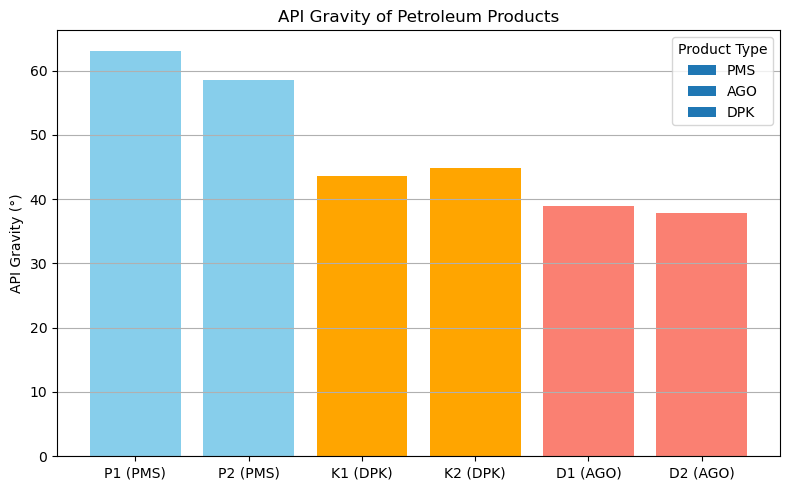

In [13]:

df["Product"] = df["Product"].str.strip()
df["Group"] = df["Product"].apply(lambda x: "PMS" if x.startswith("P") else ("AGO" if x.startswith("D") else "DPK"))
colors = {"PMS": "skyblue", "AGO": "salmon", "DPK": "orange"}
bar_colors = df["Group"].map(colors)
df_plot = df[bar_colors.notnull()]
bar_colors = bar_colors[bar_colors.notnull()]

plt.figure(figsize=(8, 5))
plt.bar(df_plot["Product"], df_plot["API_Gravity"], color=bar_colors)
plt.title("API Gravity of Petroleum Products")
plt.ylabel("API Gravity (°)")
plt.grid(axis='y')

# Simple legend
plt.bar([], [], color='skyblue', label='PMS')
plt.bar([], [], color='salmon', label='AGO')
plt.bar([], [], color='orange', label='DPK')
plt.legend(title="Product Type")

plt.tight_layout()
plt.show()


# VISCOSITY (cSt @100°F)
Viscosity is the resistance of a fluid to flow. Higher viscosity means a thicker fluid.

- AGO has the highest viscosity, which means it is a thicker fluid and harder to pump.

- PMS has the lowest viscosity, is light, and flows easily.

#While it matters: it affects combustion, engine efficiency, and fuel injection.

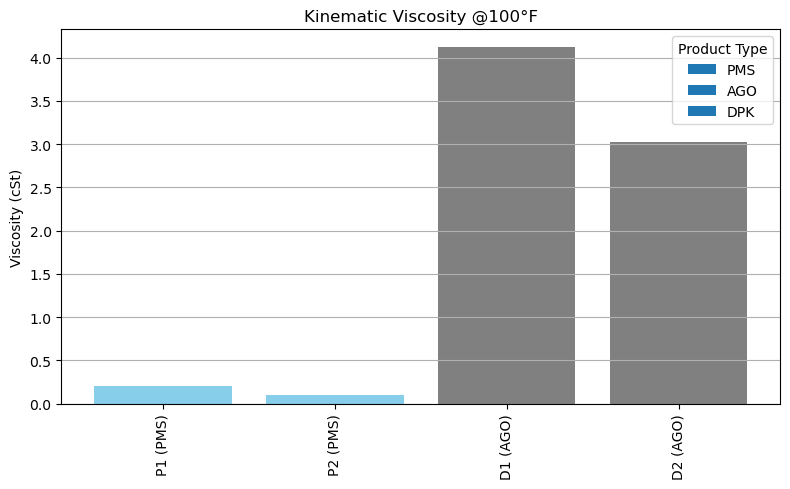

In [25]:
# plot viscosity (skip missing values)

plt.figure(figsize=(8, 5))
plt.bar(df_viz["Product"], df_viz["Viscosity_cSt_100F"], color=bar_colors)
plt.title("Kinematic Viscosity @100°F")
plt.ylabel("Viscosity (cSt)")
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.tight_layout()

# Add consistent legend
plt.bar([], [], color='skyblue', label='PMS')
plt.bar([], [], color='salmon', label='AGO')
plt.bar([], [], color='orange', label='DPK')
plt.legend(title="Product Type")

plt.show()



# Pour Point (°C)
It measures the lowest temperature at which a fuel remains pourable.

#Interpretation:

- Lower pour point equals better performance in cold conditions

- PMS has the lowest pour point and is best for cold flow

#why it matters:

It prevents fuel thickening or line blockage in cold climates.



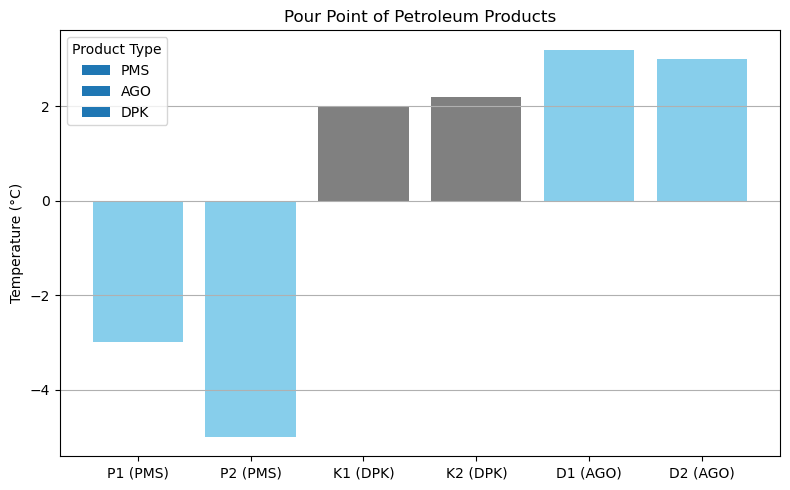

In [28]:
# plot pour point

plt.figure(figsize=(8, 5))
plt.bar(df["Product"], df["Pour_Point_C"], color=bar_colors)
plt.title("Pour Point of Petroleum Products")
plt.ylabel("Temperature (°C)")
plt.grid(axis='y')

# Manual legend
plt.bar([], [], color='skyblue', label='PMS')
plt.bar([], [], color='salmon', label='AGO')
plt.bar([], [], color='orange', label='DPK')
plt.legend(title="Product Type")

plt.tight_layout()
plt.show()



# Why Some Pour Point Bars Face Down

In this plot, some bars point downward because their values are **negative**. 

This is not an error, it means that the fuel remains pourable even **below 0°C**, which is a good cold-flow property. 

For example, PMS has a low (negative) pour point, making it suitable for use in colder environments.
This behavior reflects real-world fuel characteristics and aligns with what was reported in the study.


# Flash point(°C)
Flash point measures the minimum temperature at which fuel vapors ignite in air.

#Interpretation:

- PMS has the lowest flash point and is more flammable

- AGO has highest flash point and safer to handle.

#While it matters:

It is used to determine fuel safty for handling,transport, and storage.

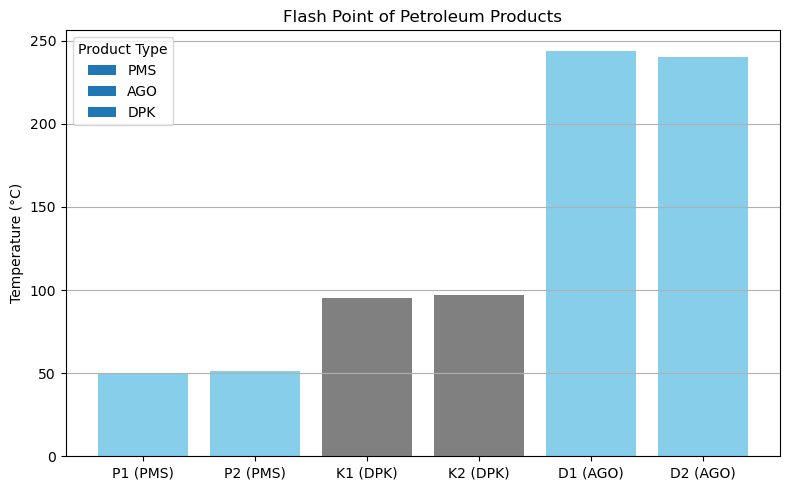

In [32]:
# Plot flash point

plt.figure(figsize=(8, 5))
plt.bar(df["Product"], df["Flash_Point_C"], color=bar_colors)
plt.title("Flash Point of Petroleum Products")
plt.ylabel("Temperature (°C)")
plt.grid(axis='y')

# Optional: Add consistent legend
plt.bar([], [], color='skyblue', label='PMS')
plt.bar([], [], color='salmon', label='AGO')
plt.bar([], [], color='orange', label='DPK')
plt.legend(title="Product Type")

plt.tight_layout()
plt.show()


# Summary of Observations from Sample Analysis

Based on the physicochemical properties extracted from the published study, the following observations were made:

- **Flash Point**:
  - The PMS samples (P1 and P2) have flash points around 49.6°C and 51.1°C, which are within the expected range for gasoline but near the lower limit. While still acceptable, values below 45°C would typically raise concerns of possible adulteration.
  - The AGO samples (D1 and D2) show very high flash points (240–244°C), which is characteristic of diesel fuels and suggests good safety performance.
  - DPK (Kerosene) samples (K1 and K2) show flash points just below 100°C — consistent with kerosene standards.

- **Viscosity**:
  - Viscosity values are missing for K1 and K2. Among the diesel samples, D1 shows higher viscosity (4.12 cSt) than D2 (3.02 cSt), which may suggest different grades or possible dilution in D2.

- **Pour Point**:
  - Negative pour points in PMS (−3°C and −5°C) are expected and desirable for cold-start performance.
  - AGO and DPK samples range between +2.0°C and +3.2°C, which is normal for middle distillates, with no concerning deviations.

- **API Gravity**:
  - PMS samples show high API gravity (58.6 and 63.1), indicating they are light fuels.
  - DPK samples range around 44–45, and AGO samples are heavier (37.9–38.9), which aligns with their expected classifications.
  - Slight variation between D1 and D2 or P1 and P2 may reflect source differences or processing inconsistencies.

Overall, no major deviations from standard fuel specifications were observed. Minor differences may reflect sourcing, batch variability, or blending — but no clear signs of adulteration or quality failure were found in the provided data.